<div align="center"> <h1> <span style="color:green">  Deep Learning model to Monitor  </span>   <span style="color:red">  Handwritten Numbers  </span>  </h1>  
Jayakumar. S PhD, </br>
www.jkuse.com
</div>

It will prompt you to select a file. Click on “Choose Files” then select and upload the file. Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it. 
Finally, type in the following code to import it into a dataframe (make sure the filename matches the name of the uploaded file).



In [2]:
import gzip
import os
import numpy as np

from google.colab import drive
 
MOUNTPOINT = "/content/gdrive"
DATADIR = os.path.join(MOUNTPOINT, "My Drive")
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


Then, Colab will request permission to access your Google Drive files, which you can do after selecting which Google account you want to give it access to. After giving it the required permissions, we can see our Google Drive mounted in the Files tab on the left-hand side.

In [3]:
...
# writes directly to google drive
with open(f"{DATADIR}/jj.txt", "w") as outfile:
    outfile.write("Hello World!")

This code snippet writes Hello World! to a test.txt file in the top level of your Google Drive. Similarly, we can read from a file in our Google Drive as well by using:

In [4]:

...
with open(f"{DATADIR}/jj.txt", "r") as infile:
    file_data = infile.read()
    print(file_data)

Hello World!


In [37]:
fileLocation = "/events/DLbook/DLtrain/DataSet/data/"

file1 = "train-labels-idx1-ubyte.gz"
file2 = "train-images-idx3-ubyte.gz"
file3 = "t10k-labels-idx1-ubyte.gz"
file4 = "t10k-images-idx3-ubyte.gz"

In [38]:
with gzip.open(f"{DATADIR}{fileLocation}{file1}", 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)


with gzip.open(f"{DATADIR}{fileLocation}{file2}", 'rb') as imgpath:
    x_train = np.frombuffer(
    imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)
    
with gzip.open(f"{DATADIR}{fileLocation}{file3}", 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)
    
with gzip.open(f"{DATADIR}{fileLocation}{file4}", 'rb') as imgpath:
    x_test = np.frombuffer(
    imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

In [39]:
train_images = x_train
train_labels = y_train
print(train_images.shape)
print(train_labels.shape)
trainX = x_train
trainy = y_train

(60000, 28, 28)
(60000,)


In [40]:
from tensorflow.python.keras.utils.data_utils import get_file

In [41]:
test_images = x_test 
test_labels = y_test
print(test_images.shape)
print(test_labels.shape)
testX = x_test 
testy =  y_test

(10000, 28, 28)
(10000,)


In [42]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [43]:
print(trainX.shape[0])
print(testX.shape[0])
trainX1 = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX1 = testX.reshape((testX.shape[0], 28, 28, 1)) 
print('Afer Reshape input array image in to tensor')
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

60000
10000
Afer Reshape input array image in to tensor
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [44]:
from matplotlib import pyplot

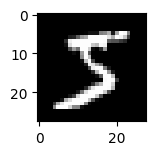

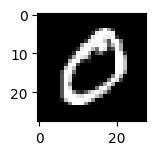

In [45]:
for i in range(2):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [46]:
train_norm = trainX1.astype('float32')
test_norm = testX1.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0
# return normalized images

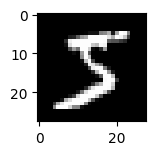

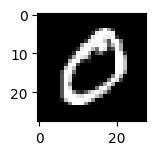

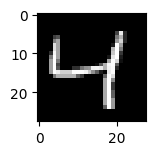

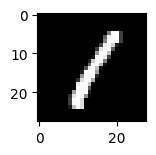

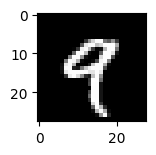

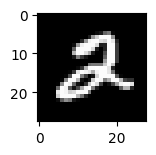

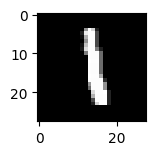

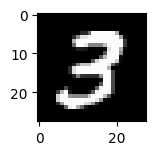

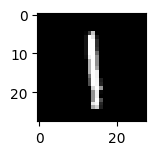

In [47]:
trainX1a = trainX.reshape((train_norm.shape[0], 28, 28))
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(trainX1a[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [48]:
from tensorflow.python.util.tf_export import tf_export
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from numpy import mean

In [49]:
print(trainy.shape)
trainY = to_categorical(trainy)
testY = to_categorical(testy)



(60000,)


In [50]:
print(trainY.shape)
print(testY.shape)

(60000, 10)
(10000, 10)


In [51]:
for i in range(10):
    print(trainY[58888][i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0


In [52]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [53]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [54]:
scores, histories = list(), list()
history = model.fit(train_norm, trainY, epochs=5, batch_size=32, validation_data=(test_norm, testY), verbose=1)

Epoch 1/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1660 - accuracy: 0.9496 - val_loss: 0.0664 - val_accuracy: 0.9806
Epoch 2/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0562 - accuracy: 0.9834 - val_loss: 0.0449 - val_accuracy: 0.9848
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0365 - accuracy: 0.9887 - val_loss: 0.0475 - val_accuracy: 0.9841
Epoch 4/5
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0243 - accuracy: 0.9926 - val_loss: 0.0413 - val_accuracy: 0.9861
Epoch 5/5
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0178 - accuracy: 0.9951 - val_loss: 0.0364 - val_accuracy: 0.9882


In [55]:
_, acc = model.evaluate(test_norm, testY, verbose=1)
print('> %.3f' % (acc * 100.0))
# stores scores
scores.append(acc)
histories.append(history)
print(history)

313/313 [==============================] - 4s 12ms/step - loss: 0.0364 - accuracy: 0.9882
> 98.820


In [56]:
print(histories[0].history)
print(histories[0].history)

{'loss': [0.16599680483341217, 0.05618448927998543, 0.03647845983505249, 0.024251552298665047, 0.01782836578786373], 'accuracy': [0.9495833516120911, 0.9834166765213013, 0.9886666536331177, 0.9926499724388123, 0.9950500130653381], 'val_loss': [0.06639056652784348, 0.04489178955554962, 0.047489065676927567, 0.04130338132381439, 0.036355167627334595], 'val_accuracy': [0.9805999994277954, 0.9847999811172485, 0.9840999841690063, 0.9861000180244446, 0.9882000088691711]}
{'loss': [0.16599680483341217, 0.05618448927998543, 0.03647845983505249, 0.024251552298665047, 0.01782836578786373], 'accuracy': [0.9495833516120911, 0.9834166765213013, 0.9886666536331177, 0.9926499724388123, 0.9950500130653381], 'val_loss': [0.06639056652784348, 0.04489178955554962, 0.047489065676927567, 0.04130338132381439, 0.036355167627334595], 'val_accuracy': [0.9805999994277954, 0.9847999811172485, 0.9840999841690063, 0.9861000180244446, 0.9882000088691711]}


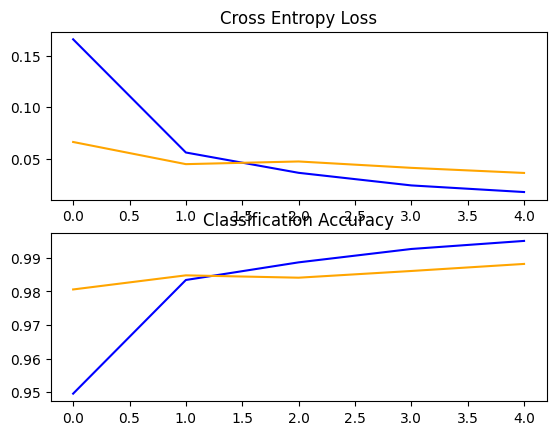

In [57]:
for i in range(len(histories)):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    #pyplot.plot(histories[i].history['acc'], color='blue', label='train')
    #pyplot.plot(histories[i].history['val_acc'], color='orange', label='test')
    pyplot.show()

Accuracy: mean=98.820 std=0.000, n=1


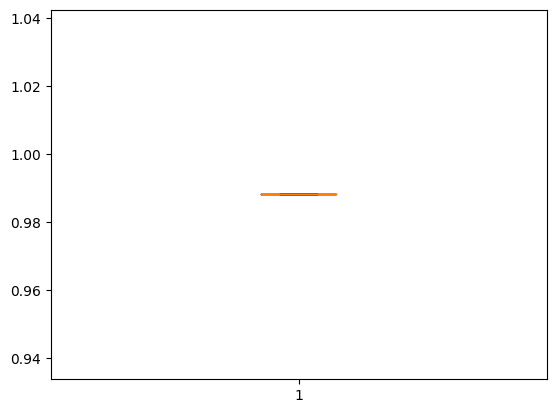

In [58]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
# box and whisker plots of results
pyplot.boxplot(scores)
pyplot.show()